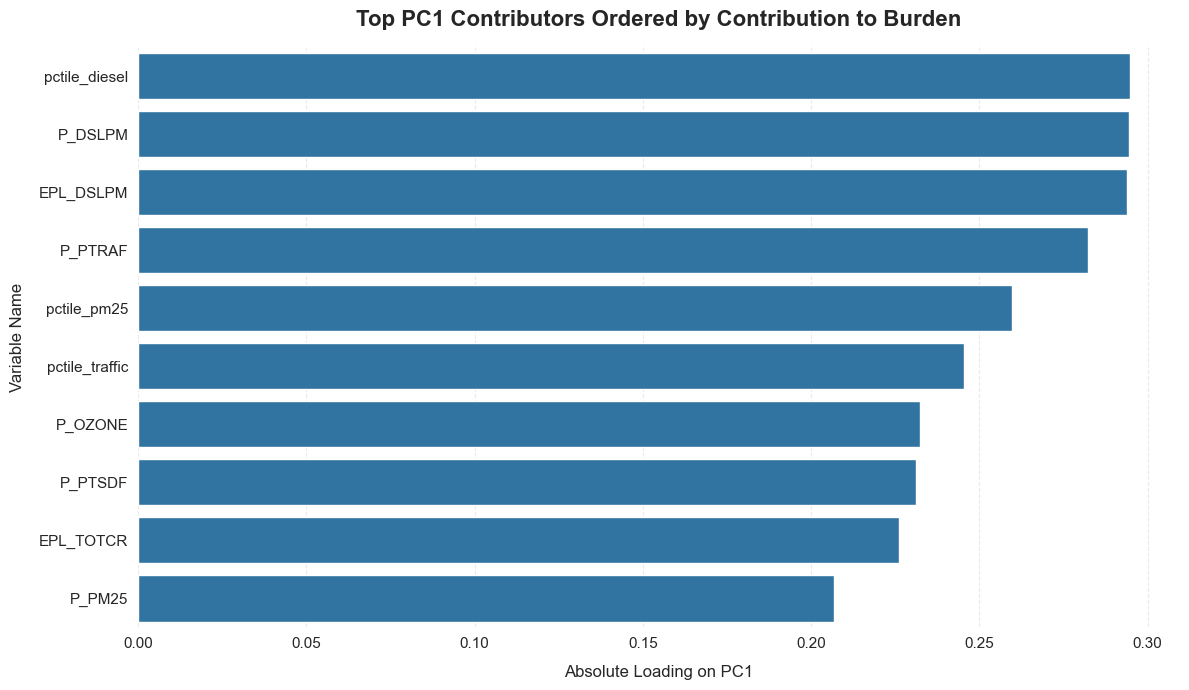

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
model_vars = pd.read_csv("model_vars.csv")

# Select and scale numeric columns
numeric = model_vars.select_dtypes(include='number')
scaled = StandardScaler().fit_transform(numeric)

# Run PCA
pca = PCA(n_components=2)
pca.fit(scaled)

# Extract PC1
pc1_loadings = pd.Series(pca.components_[0], index=numeric.columns)

# Get top contributors
pc1_contrib = pc1_loadings.abs().sort_values(ascending=False).head(10)

# Create dataframe of top contributors
top_pc1_factors = pd.DataFrame({
    "Variable": pc1_contrib.index,
    "Absolute Loading on PC1": pc1_contrib.values,
    "Direction": ["Positive" if pc1_loadings[v] > 0 else "Negative" for v in pc1_contrib.index]
})

# Sort from most to least burden-contributing
top_pc1_ordered = top_pc1_factors.sort_values(by="Absolute Loading on PC1", ascending=False)

# Bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

barplot = sns.barplot(
    data=top_pc1_ordered,
    y="Variable",
    x="Absolute Loading on PC1",
    color="#1f77b4"
)

plt.title("Top PC1 Contributors Ordered by Contribution to Burden", fontsize=16, weight='bold', pad=15)
plt.xlabel("Absolute Loading on PC1", fontsize=12, labelpad=10)
plt.ylabel("Variable Name", fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.box(False)
plt.tight_layout()
plt.show()
